In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\geral\anaconda3\envs\advpython\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("austinHousingData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,garageSpaces,hasAssociation,hasCooling,...,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,2,True,True,...,9,2019,6011.0,2601,1.266667,2.666667,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,2,True,True,...,10,2020,6185.0,1768,1.400000,2.666667,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,0,True,True,...,7,2019,7840.0,1478,1.200000,3.000000,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,2,True,True,...,8,2018,6098.0,1678,1.400000,2.666667,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,0,True,True,...,10,2018,6708.0,2132,1.133333,4.000000,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


# Select your features (columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15171 entries, 0 to 15170
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zpid               15171 non-null  int64  
 1   city               15171 non-null  object 
 2   streetAddress      15171 non-null  object 
 3   zipcode            15171 non-null  int64  
 4   description        15171 non-null  object 
 5   latitude           15171 non-null  float64
 6   longitude          15171 non-null  float64
 7   garageSpaces       15171 non-null  int64  
 8   hasAssociation     15171 non-null  bool   
 9   hasCooling         15171 non-null  bool   
 10  hasView            15171 non-null  bool   
 11  homeType           15171 non-null  object 
 12  yearBuilt          15171 non-null  int64  
 13  latestPrice        15171 non-null  int64  
 14  latest_salemonth   15171 non-null  int64  
 15  latest_saleyear    15171 non-null  int64  
 16  lotSizeSqFt        151

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['latest_saleyear','yearBuilt','garageSpaces', 'lotSizeSqFt',
                        'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
                        'avgSchoolRating','avgSchoolDistance', 'latestPrice', 'latest_salemonth']]

selected_features.head()

,latest_saleyear,yearBuilt,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,avgSchoolRating,avgSchoolDistance,latestPrice,latest_salemonth
0,2019,2012,2,6011.0,2601,3.0,4,2,2.666667,1.266667,305000,9
1,2020,2013,2,6185.0,1768,2.0,4,1,2.666667,1.400000,295000,10
2,2019,2018,0,7840.0,1478,2.0,3,1,3.000000,1.200000,256125,7
3,2018,2013,2,6098.0,1678,2.0,3,1,2.666667,1.400000,240000,8
4,2018,2002,0,6708.0,2132,3.0,3,2,4.000000,1.133333,239900,10


In [15]:
selected_features2 = df[['latestPrice', 'numOfBathrooms', 'livingAreaSqFt']]

selected_features2.head()

,latestPrice,numOfBathrooms,livingAreaSqFt
0,305000,3.0,2601
1,295000,2.0,1768
2,256125,2.0,1478
3,240000,2.0,1678
4,239900,3.0,2132


In [16]:
# train, test, split
X = selected_features2
y = df['latestPrice'].values.reshape(-1, 1)
print(X.shape, y.shape)

(15171, 3) (15171, 1)


In [17]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_train.head()

,latestPrice,numOfBathrooms,livingAreaSqFt
1145,142136,2.0,1650
8937,285000,2.0,1115
14600,615000,2.0,1361
13509,486000,2.5,2627
733,775000,3.0,3114


# Data Preprocessing

In [11]:
# df['homeType'] = df['homeType'].str.replace(',', '')
# df['homeType'] = df['homeType'].convert_objects(convert_numeric=True)
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [12]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

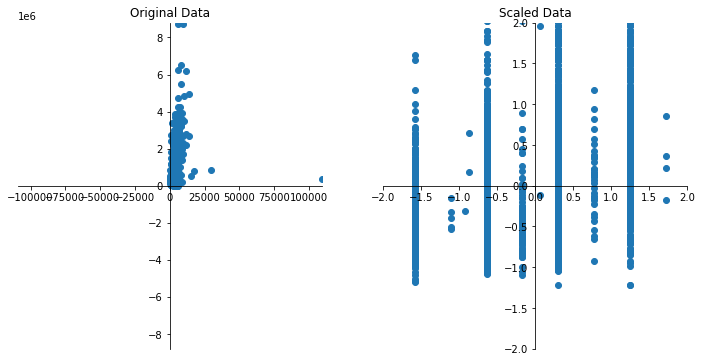

In [13]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["livingAreaSqFt"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 100, maxx + 100)
# axes1.set_ylim(-maxy + 100, maxy + 100)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["livingAreaSqFt"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [14]:
# Scale your data. Import dependencies.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical

# Scale the data.
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encoder dataset.
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

C:\Users\geral\anaconda3\envs\advPython\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: y contains previously unseen labels: [6800, 7500, 7900, 52500, 66900, 72900, 74000, 77500, 85000, 97650, 102000, 102500, 112000, 114900, 115100, 118499, 118750, 119889, 120600, 122000, 125595, 126900, 131400, 131679, 132500, 134850, 136000, 139777, 139950, 142500, 145800, 151500, 153800, 153900, 156485, 156500, 159950, 164500, 167500, 171900, 172500, 174500, 174990, 176000, 176258, 178950, 181500, 183500, 185295, 185900, 186500, 188673, 188800, 189123, 191000, 194990, 196640, 198700, 199888, 201000, 202000, 204400, 208000, 208500, 210500, 214990, 218800, 219965, 220813, 224850, 224995, 226900, 229272, 229500, 233300, 234999, 236500, 239979, 245270, 245500, 246500, 254500, 258900, 259400, 259995, 259997, 263484, 264788, 264935, 268729, 269950, 273700, 273900, 274990, 276500, 277444, 277500, 277900, 279945, 279998, 281899, 282490, 284995, 285990, 286800, 286900, 286990, 287800, 289700, 289975, 289997, 290900, 292076, 294990, 295400, 296000, 296640, 297700, 297778, 303000, 306000, 307990, 308036, 308500, 309899, 309989, 309998, 311995, 312400, 313990, 314289, 314888, 315400, 323900, 324995, 326990, 328200, 328900, 329888, 329890, 329950, 334400, 335240, 339150, 341494, 345990, 347300, 347777, 355500, 356900, 357535, 359400, 361888, 366900, 369820, 372505, 374257, 375525, 375999, 377000, 379650, 379990, 382200, 383990, 387900, 388990, 390500, 390900, 392735, 395500, 395625, 398500, 398990, 399777, 399993, 409999, 415095, 417900, 419550, 419650, 427990, 429899, 430650, 433000, 439850, 444297, 444990, 446760, 447900, 448843, 454000, 456900, 459888, 459950, 462500, 464800, 467900, 468900, 468956, 469700, 469990, 469995, 469997, 470900, 477555, 482250, 484999, 489009, 494950, 498850, 499899, 499995, 504000, 508000, 510900, 514999, 515900, 519999, 524444, 526990, 532665, 532900, 533000, 534435, 536000, 536800, 537000, 537500, 538000, 539997, 544500, 545400, 549700, 559500, 559997, 559999, 569700, 574887, 574999, 575701, 583990, 587900, 594000, 596000, 597000, 598400, 606000, 613300, 614500, 624990, 627000, 630090, 631000, 638500, 639490, 644580, 648500, 648900, 659800, 663000, 669990, 669997, 672500, 673000, 674988, 674990, 684000, 687500, 699850, 707000, 709999, 722000, 728950, 732000, 749999, 758822, 767500, 773850, 774990, 775900, 779997, 787000, 794995, 795775, 799888, 805000, 814500, 824500, 834900, 838500, 874500, 884000, 890728, 930000, 949950, 969444, 995900, 998000, 999444, 999857, 1002000, 1029000, 1070000, 1080000, 1084000, 1089999, 1098500, 1140000, 1229000, 1235000, 1249990, 1249999, 1259000, 1285000, 1299990, 1313700, 1319000, 1380000, 1460000, 1488000, 1499987, 1699900, 1829000, 1899900, 1940000, 2099900, 2199000, 2299000, 2397000, 2450000, 2489000, 2749000, 2790000, 2850000, 2900000, 2999000, 3100000, 3349000, 3450000, 3499000, 3750000, 4100000, 4995000, 5495000, 8999000, 12720000, 13000000, 13500000]

In [ ]:
plt.show()

In [ ]:
df.describe()

In [ ]:
# Charting
selected_features.hist(bins=50, figsize=(20,15))
# plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="latestPrice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [ ]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix["latestPrice"].sort_values(ascending=False)

In [ ]:
ax1 = df.plot.scatter(x='livingAreaSqFt',y='latestPrice',c='latestPrice', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("livingAreaSqFt", fontsize=14)
ax1.set_ylabel("latestPrice", fontsize=14)

In [ ]:
df.plot(kind="scatter", x="numOfBathrooms", y="latestPrice", alpha=0.5)
# plt.savefig('scatter.png')

df.plot(kind="scatter", x="livingAreaSqFt", y="latestPrice", alpha=0.5)
# plt.savefig('scatter.png')

# Create a Train Test Split

In [ ]:
# X_train.head()

from sklearn.model_selection import train_test_split

selected_features_train, selected_features_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

# Create model


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the Model



In [ ]:
model.fit(selected_features_train, y_train)
training_score = model.score(selected_features_train, y_train)
testing_score = model.score(selected_features_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# Plot Residuals

In [ ]:
plt.scatter(model.predict(selected_features_train), model.predict(selected_features_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(selected_features_test), model.predict(selected_features_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)